# P4- Titanic Data analysis

### By Vivek Pandey

## Introduction

Titanic dataset contains demographics and passenger information from 891 of the 2224 passengers and crew on board the Titanic. You can view a description of this dataset on the Kaggle website, where the data was obtained (https://www.kaggle.com/c/titanic/data).

"One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class."

For the case study I'm using the jupyter notebook, python and the number of libraries (pandas, numpy, matplotlib and seaborn).

## 1- Questions

With Titanic dataset I will analyze about the individual passengers who were on the titanic and what factors made passengers more likely to survive.

Here I will analyze at one dependent variable (Survived) and four independent variables which are passenger class, gender, age and passenger with or without family.

After brainstorming on this dataset and considering above dependent variable & independent variables I came across following questions which I can investigate and answer:

- What factors made people more likely to survive?
  - Did passenger class (1st Class, 2nd Class, 3rd Class) effect their possibility of survival?
  - Did women who belongs to higher class has more chance of survival?
  - Did passengers' gender effect their possibility of survival?
  - Did passengers' age effect their possibility of survival?
  - Was the passenger with or without family has effect on their survivability.
  

## 2- Data Wrangling

### Data Acquisition

Reading data into pandas and Importing the required packages



In [3]:
# Import pandas & numpy

import numpy as np
import pandas as pd

# import seaborn & matplotlib for graphing
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Read Titanic CSV into a pandas dataframe 
TitanicData_DF = pd.read_csv("Titanic_Data.csv")

# Print first few records to check for data and formats
TitanicData_DF.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data cleaning

As per the list of questions to answer I found that many dataset columns are not going to use for analysis except dependent & independent variables.

As part of data cleaning process I will remove unnecessary dataset columns and will fix missing data.

#### Removing unnecessary dataset columns



In [9]:
# Create new dataset with required columns

TitanicData_DF1 = TitanicData_DF.drop(['Name','Ticket','Cabin','Fare','Embarked'], axis=1)
TitanicData_DF1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0


In [11]:
#quick overview of the data in the dataset
TitanicData_DF1.info()
TitanicData_DF1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
dtypes: float64(1), int64(5), object(1)
memory usage: 48.8+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


Using above dataset info I identified that ages infor is available only for 714 of 891 passengers.

In [13]:
# review some of the passenger whose age is missing
TitanicData_DF1[pd.isnull(TitanicData_DF1.Age)].head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
5,6,0,3,male,NaN,0,0
17,18,1,2,male,NaN,0,0
19,20,1,3,female,NaN,0,0
26,27,0,3,male,NaN,0,0
28,29,1,3,female,NaN,0,0


##### Missing age data will affect "Did passengers' age effect their possibility of survival?"

## 3- Titanic data exploration 

##### Question 1
Did passenger class (1st Class, 2nd Class, 3rd Class) effect their possibility of survival?

In [74]:
# passengers grouped by class, suvival
Survival_by_class=TitanicData_DF1.pivot_table(values='PassengerId' , columns=['Pclass','Survived'], aggfunc='count')
Survival_by_class= Survival_by_class.to_frame().reset_index()
Survival_by_class =Survival_by_class.rename(columns={0:'count'})
Survival_by_class

,Pclass,Survived,count
0,1,0,80
1,1,1,136
2,2,0,97
3,2,1,87
4,3,0,372
5,3,1,119


This gives summary of passengers by class and survival

In [75]:
# survival rate of Class 1 passengers
Survival_by_class_Perc=TitanicData_DF1.query('Pclass==1').pivot_table(values='PassengerId' , columns=['Pclass','Survived'], aggfunc='count')
Survival_by_class_Perc = Survival_by_class_Perc.to_frame().reset_index()
Survival_by_class_Perc=Survival_by_class_Perc.rename(columns={0:'count'})
Survival_by_class_Perc['Perc']=Survival_by_class_Perc['count']/Survival_by_class_Perc['count'].sum() *100
Survival_by_class_Perc

,Pclass,Survived,count,Perc
0,1,0,80,37.037037
1,1,1,136,62.962963


62.96 % Class 1 passengers were survived

In [76]:
# survival rate of Class 2 passengers
Survival_by_class_Perc=TitanicData_DF1.query('Pclass==2').pivot_table(values='PassengerId' , columns=['Pclass','Survived'], aggfunc='count')
Survival_by_class_Perc = Survival_by_class_Perc.to_frame().reset_index()
Survival_by_class_Perc=Survival_by_class_Perc.rename(columns={0:'count'})
Survival_by_class_Perc['Perc']=Survival_by_class_Perc['count']/Survival_by_class_Perc['count'].sum() *100
Survival_by_class_Perc

,Pclass,Survived,count,Perc
0,2,0,97,52.717391
1,2,1,87,47.282609


47.28 % Class 1 passengers were survived

In [77]:
# survival rate of Class 3 passengers
Survival_by_class_Perc=TitanicData_DF1.query('Pclass==3').pivot_table(values='PassengerId' , columns=['Pclass','Survived'], aggfunc='count')
Survival_by_class_Perc = Survival_by_class_Perc.to_frame().reset_index()
Survival_by_class_Perc=Survival_by_class_Perc.rename(columns={0:'count'})
Survival_by_class_Perc['Perc']=Survival_by_class_Perc['count']/Survival_by_class_Perc['count'].sum() *100
Survival_by_class_Perc

,Pclass,Survived,count,Perc
0,3,0,372,75.763747
1,3,1,119,24.236253


24.23 % Class 1 passengers were survived

In [78]:
Survival_by_class_count=TitanicData_DF1.query('Survived==1').groupby(['Pclass','Survived'],as_index=False).count()[['Pclass','Survived','PassengerId']]
Survival_by_class_Percentage = Survival_by_class_count['PassengerId']/Survival_by_class_count['PassengerId'].sum()
Non_Survival_by_class_Percentage=Survival_by_class_Percentage.rename(index={0:'1st class non survivors',1:'2nd class non survivors',2:'3rd class non survivors'})
Non_Survival_by_class_Percentage

1st class non survivors    0.397661
2nd class non survivors    0.254386
3rd class non survivors    0.347953
Name: PassengerId, dtype: float64

In [85]:
Non_Survival_by_class_count=TitanicData_DF1.query('Survived==0').groupby(['Pclass','Survived'],as_index=False).count()[['Pclass','Survived','PassengerId']]
Non_Survival_by_class_Percentage = Non_Survival_by_class_count['PassengerId']/Non_Survival_by_class_count['PassengerId'].sum()
Non_Survival_by_class_Percentage=Non_Survival_by_class_Percentage.rename(index={0:'1st class non survivors',1:'2nd class non survivors',2:'3rd class non survivors'})
Non_Survival_by_class_Percentage

1st class non survivors    0.145719
2nd class non survivors    0.176685
3rd class non survivors    0.677596
Name: PassengerId, dtype: float64

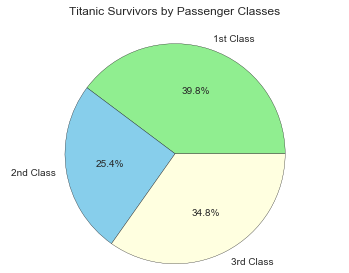

In [90]:

# Survivor class pie chart
labels = '1st Class', '2nd Class', '3rd Class'
sizes = [Survival_by_class_Percentage.iloc[0],Survival_by_class_Percentage.iloc[1],Survival_by_class_Percentage.iloc[2]]
colors = ['lightgreen', 'skyblue','lightyellow']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Titanic Survivors by Passenger Classes', y=1.1)

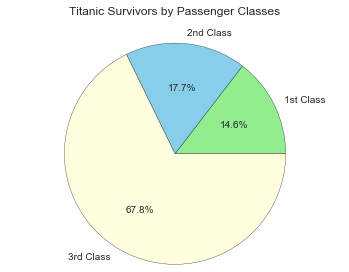

In [91]:

# Non Survivor class pie chart
labels = '1st Class', '2nd Class', '3rd Class'
sizes = [Non_Survival_by_class_Percentage.iloc[0],Non_Survival_by_class_Percentage.iloc[1],Non_Survival_by_class_Percentage.iloc[2]]
colors = ['lightgreen', 'skyblue','lightyellow']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Titanic Survivors by Passenger Classes', y=1.1)

Passenger class was a major factor in survival rate of passengers.
- Class 1 survival rate: 62.96%
- Class 2 survival rate: 47.28%
- Class 3 survival rate: 24.23%

By looking at no of survivors in each class (1st- 136 ,2nd- 87, 3rd- 119) it misleads our analysis since as per those numbers it seems class 1 and class 3 has similar survival rate, however when we analyze percentage of survivors in each class using survival rate then we found that class 1 passengers are 2.5 times more likely to survive than passengers in class 3.


#### Question 2

Did women who belongs to higher class has more chance of survival?

In [92]:
# passengers grouped by class, suvival and sex
Survival_by_class_Age=TitanicData_DF1.pivot_table(values='PassengerId' , columns=['Pclass','Survived','Sex'], aggfunc='count')
Survival_by_class_Age= Survival_by_class_Age.to_frame().reset_index()
Survival_by_class_Age =Survival_by_class_Age.rename(columns={0:'count'})
Survival_by_class_Age

,Pclass,Survived,Sex,count
0,1,0,female,3
1,1,0,male,77
2,1,1,female,91
3,1,1,male,45
4,2,0,female,6
5,2,0,male,91
6,2,1,female,70
7,2,1,male,17
8,3,0,female,72
9,3,0,male,300


This gives summary of passengers by class,age and survival

In [105]:
# survival rate of Class 1 and female passengers
Survival_by_class_Perc=TitanicData_DF1.query('Pclass==1 & Sex=="female"').pivot_table(values='PassengerId' , columns=['Pclass','Sex','Survived'], aggfunc='count')
Survival_by_class_Perc = Survival_by_class_Perc.to_frame().reset_index()
Survival_by_class_Perc=Survival_by_class_Perc.rename(columns={0:'count'})
Survival_by_class_Perc['Percentage']=Survival_by_class_Perc['count']/Survival_by_class_Perc['count'].sum() *100
Survival_by_class_Perc

,Pclass,Sex,Survived,count,Percentage
0,1,female,0,3,3.191489
1,1,female,1,91,96.808511


female survival rate was 96.80% which is giving clear indication that 1st class female was most likely to survive.

In [106]:
# survival rate of Class 1 and male passengers
Survival_by_class_Perc=TitanicData_DF1.query('Pclass==1 & Sex=="male"').pivot_table(values='PassengerId' , columns=['Pclass','Sex','Survived'], aggfunc='count')
Survival_by_class_Perc = Survival_by_class_Perc.to_frame().reset_index()
Survival_by_class_Perc=Survival_by_class_Perc.rename(columns={0:'count'})
Survival_by_class_Perc['Percentage']=Survival_by_class_Perc['count']/Survival_by_class_Perc['count'].sum() *100
Survival_by_class_Perc

,Pclass,Sex,Survived,count,Percentage
0,1,male,0,77,63.114754
1,1,male,1,45,36.885246


Male survival rate was 36.88% which is not high so 1st class male was less likely to survive.

In [107]:
# survival rate of Class 2 and female passengers
Survival_by_class_Perc=TitanicData_DF1.query('Pclass==2 & Sex=="female"').pivot_table(values='PassengerId' , columns=['Pclass','Sex','Survived'], aggfunc='count')
Survival_by_class_Perc = Survival_by_class_Perc.to_frame().reset_index()
Survival_by_class_Perc=Survival_by_class_Perc.rename(columns={0:'count'})
Survival_by_class_Perc['Percentage']=Survival_by_class_Perc['count']/Survival_by_class_Perc['count'].sum() *100
Survival_by_class_Perc

,Pclass,Sex,Survived,count,Percentage
0,2,female,0,6,7.894737
1,2,female,1,70,92.105263


2nd class female survival rate was 92.10% which is also high and it shows that even 2nd class female were likely to survive, which construed that female had great chance of survival.

In [108]:
# survival rate of Class 2 and female passengers
Survival_by_class_Perc=TitanicData_DF1.query('Pclass==2 & Sex=="male"').pivot_table(values='PassengerId' , columns=['Pclass','Sex','Survived'], aggfunc='count')
Survival_by_class_Perc = Survival_by_class_Perc.to_frame().reset_index()
Survival_by_class_Perc=Survival_by_class_Perc.rename(columns={0:'count'})
Survival_by_class_Perc['Percentage']=Survival_by_class_Perc['count']/Survival_by_class_Perc['count'].sum() *100
Survival_by_class_Perc

,Pclass,Sex,Survived,count,Percentage
0,2,male,0,91,84.259259
1,2,male,1,17,15.740741


Male survival rate was 15.74% which is very less hence 2st class male was very less likely to survive.

In [109]:
# survival rate of Class 3 and female passengers
Survival_by_class_Perc=TitanicData_DF1.query('Pclass==3 & Sex=="female"').pivot_table(values='PassengerId' , columns=['Pclass','Sex','Survived'], aggfunc='count')
Survival_by_class_Perc = Survival_by_class_Perc.to_frame().reset_index()
Survival_by_class_Perc=Survival_by_class_Perc.rename(columns={0:'count'})
Survival_by_class_Perc['Percentage']=Survival_by_class_Perc['count']/Survival_by_class_Perc['count'].sum() *100
Survival_by_class_Perc

,Pclass,Sex,Survived,count,Percentage
0,3,female,0,72,50.0
1,3,female,1,72,50.0


Female survival rate was 50.00% which shows 3rd class female had 50-50 chance of survival.

In [110]:
# survival rate of Class 2 and female passengers
Survival_by_class_Perc=TitanicData_DF1.query('Pclass==3 & Sex=="male"').pivot_table(values='PassengerId' , columns=['Pclass','Sex','Survived'], aggfunc='count')
Survival_by_class_Perc = Survival_by_class_Perc.to_frame().reset_index()
Survival_by_class_Perc=Survival_by_class_Perc.rename(columns={0:'count'})
Survival_by_class_Perc['Percentage']=Survival_by_class_Perc['count']/Survival_by_class_Perc['count'].sum() *100
Survival_by_class_Perc

,Pclass,Sex,Survived,count,Percentage
0,3,male,0,300,86.455331
1,3,male,1,47,13.544669


Male survival rate was 13.54% which is almost same as 2nd class male and had very less chance of survival

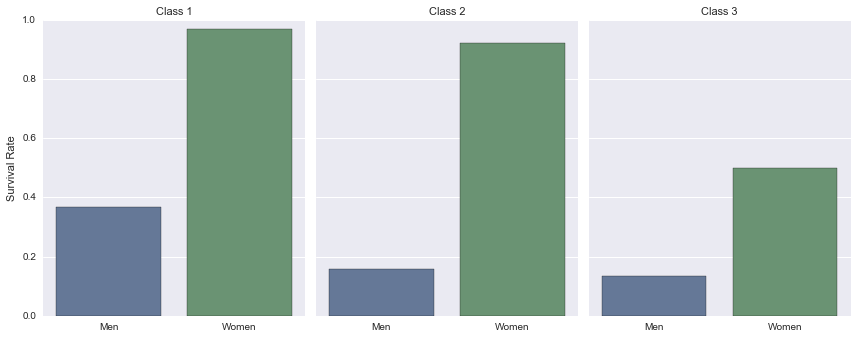

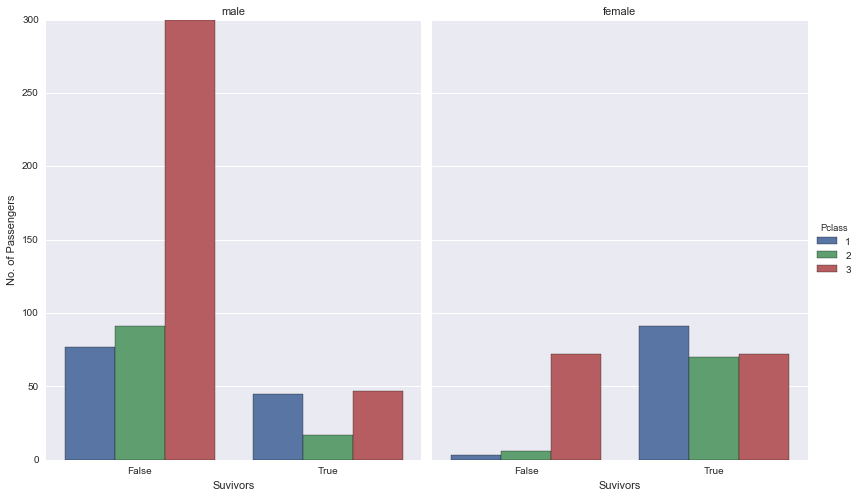

In [116]:
# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=TitanicData_DF1, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# Modify the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

# Graph - Actual count of passengers by survival, group and sex
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=TitanicData_DF1, kind='count', size=7, aspect=.8)

# Modify the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

- Class 1 - female survival rate: 96.81%
- Class 1 - male survival rate: 36.89%

- Class 2 - female survival rate: 92.11%
- Class 2 - male survival rate: 15.74%

- Class 3 - female survival rate: 50.0%
- Class 3 - male survival rate: 13.54%

By looking at above summary and graph we can construed that female was more likely to survive, moreover female who belongs to upper class had great chance of survival.

#### Question 3

Did passengers' gender effect their possibility of survival?

In [117]:
# passengers grouped by class, suvival and sex
Survival_by_class_Sex=TitanicData_DF1.pivot_table(values='PassengerId' , columns=['Sex','Survived'], aggfunc='count')
Survival_by_class_Sex= Survival_by_class_Sex.to_frame().reset_index()
Survival_by_class_Sex =Survival_by_class_Sex.rename(columns={0:'count'})
Survival_by_class_Sex

,Sex,Survived,count
0,female,0,81
1,female,1,233
2,male,0,468
3,male,1,109


In [121]:
# survival rate of female passengers
Survival_by_Sex_Perc=TitanicData_DF1.query('Sex=="female"').pivot_table(values='PassengerId' , columns=['Sex','Survived'], aggfunc='count')
Survival_by_Sex_Perc = Survival_by_Sex_Perc.to_frame().reset_index()
Survival_by_Sex_Perc=Survival_by_Sex_Perc.rename(columns={0:'count'})
Survival_by_Sex_Perc['Percentage']=Survival_by_Sex_Perc['count']/Survival_by_Sex_Perc['count'].sum() *100
Survival_by_Sex_Perc

,Sex,Survived,count,Percentage
0,female,0,81,25.796178
1,female,1,233,74.203822


female survival rate was 74.20% so it construed that female was more likely to survived.

In [127]:
# survival rate of female passengers
Survival_by_Sex_Perc1=TitanicData_DF1.query('Sex=="male"').pivot_table(values='PassengerId' , columns=['Sex','Survived'], aggfunc='count')
Survival_by_Sex_Perc1 = Survival_by_Sex_Perc1.to_frame().reset_index()
Survival_by_Sex_Perc1=Survival_by_Sex_Perc1.rename(columns={0:'count'})
Survival_by_Sex_Perc1['Percentage']=Survival_by_Sex_Perc1['count']/Survival_by_Sex_Perc1['count'].sum() *100
Survival_by_Sex_Perc1

,Sex,Survived,count,Percentage
0,male,0,468,81.109185
1,male,1,109,18.890815


male survival rate was 18.89% so it construed that male was very less likely to survived.

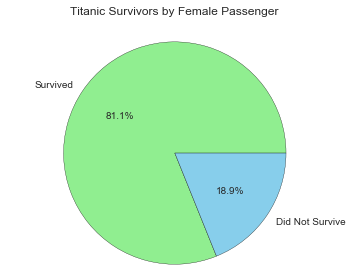

In [145]:

# Survivor Male pie chart
labels = 'Survived', 'Did Not Survive'
sizes = [Survival_by_Sex_Perc1.query('Survived==0')['Percentage'].iloc[0],Survival_by_Sex_Perc1.query('Survived==1')['Percentage'].iloc[0]]

colors = ['lightgreen', 'skyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Titanic Survivors by Female Passenger', y=1.1)

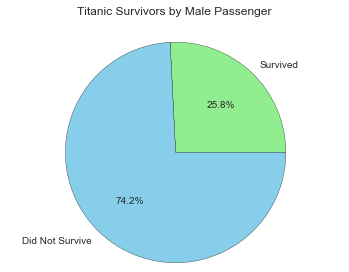

In [146]:

# Survivor female pie chart
labels = 'Survived', 'Did Not Survive'
sizes = [Survival_by_Sex_Perc.query('Survived==0')['Percentage'].iloc[0],Survival_by_Sex_Perc.query('Survived==1')['Percentage'].iloc[0]]

colors = ['lightgreen', 'skyblue']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Titanic Survivors by Male Passenger', y=1.1)

Based on above male & female survival rate and above pie charts it gives clear evidence that a person was more likely to survive as a female than as a male and gender was definitely a major factor on survival.

##### Question 4
Did passengers' age effect their possibility of survival?

Total number of survivors 290 
Total number of non survivors 424 
Mean age of survivors 28.0 
Mean age of non survivors 31.0 
Oldest to survive 80.0 
Oldest to not survive 74.0


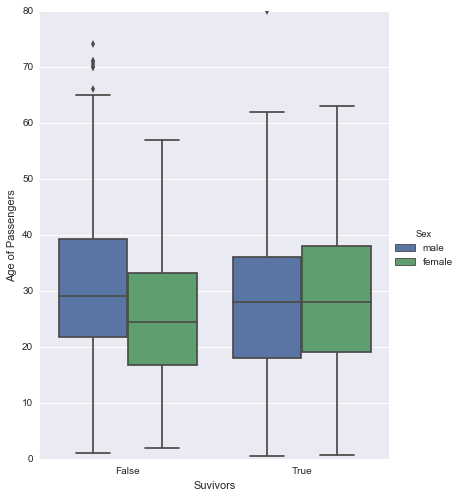

In [148]:
# Drop the NaN values
titanic_data_age_cleaned = TitanicData_DF1.dropna()

number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Survived'].count()
number_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Survived'].count()

mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Age'].mean()
mean_age_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Age'].mean()

oldest_to_survive = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Age'].max()
oldest_to_die = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Age'].max()

print 'Total number of survivors {} \n\
Total number of non survivors {} \n\
Mean age of survivors {} \n\
Mean age of non survivors {} \n\
Oldest to survive {} \n\
Oldest to not survive {}' \
.format(number_survived, number_died, np.round(mean_age_survived), 
        np.round(mean_age_died), oldest_to_survive, oldest_to_die)

# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_cleaned, kind="box", size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)


Based on above summary and boxplot we can construed that age was not a deciding factor in the passenger survival rate.

##### Question 5
Was the passenger with or without family has effect on their survivability?

In [153]:
Titanic_Family_Perc=TitanicData_DF1.query('SibSp>0 | Parch >0').pivot_table(values='PassengerId' , columns=['Sex','Survived'], aggfunc='count')
Titanic_Family_Perc = Titanic_Family_Perc.to_frame().reset_index()
Titanic_Family_Perc=Titanic_Family_Perc.rename(columns={0:'count'})
Titanic_Family_Perc['Perc']=Titanic_Family_Perc['count']/Titanic_Family_Perc['count'].sum() *100
Titanic_Family_Perc


,Sex,Survived,count,Perc
0,female,0,54,15.254237
1,female,1,134,37.853107
2,male,0,121,34.180791
3,male,1,45,12.711864


In [154]:
Titanic_Family_Perc=TitanicData_DF1.query('SibSp==0 & Parch ==0').pivot_table(values='PassengerId' , columns=['Sex','Survived'], aggfunc='count')
Titanic_Family_Perc = Titanic_Family_Perc.to_frame().reset_index()
Titanic_Family_Perc=Titanic_Family_Perc.rename(columns={0:'count'})
Titanic_Family_Perc['Perc']=Titanic_Family_Perc['count']/Titanic_Family_Perc['count'].sum() *100
Titanic_Family_Perc


,Sex,Survived,count,Perc
0,female,0,27,5.027933
1,female,1,99,18.435754
2,male,0,347,64.618250
3,male,1,64,11.918063


This give the summary of passengers who were with family and it seems we don't have sufficient information here since we don't know how many children travelled only with a nanny and technically they were with family but here we are not considering that thing.

## Conclusion and Limitations

As per the results of the analysis,we can conclude that class & sex was major factor which made people more likely to survive,moreover being a female with upper class had best chance of survival as 1st class female survival rate was 96.80% and 2nd class female survival rate was 92.10%, also overall survival rate(62.96%) was high for Class 1 so irrespective of gender class 1 passengers had good chance of survival.

While age seemed to have the least correlation with survival, and being a man in third class, gave one the lowest chance of survival. 

Travelling alone or with family is the only indicator that doesn't clearly appear to have an affect on survival as we don't have sufficient information here since we don't know how many children travelled only with a nanny and technically they were with family but here we are not considering that thing.

#### Limitation: 

The given Titanic data set has entries for 891 passengers on the Titanic, However, according to kaggle competition description there were 2,224 total passengers and crew. The Kaggle website where the data comes from doesn't give any details as to how the 891 entries were chosen, why the rest are left out, etc. I am assuming that the 891 entries are a random sample and are therefore representative of the 2,224 total.

Second limitation was that age data was missing for many men & women and in order to deal with that I have dropped those records which reduced the data set and less data can give less accurate results.

As we know in order to achieve best results more data is always very helpful.


## References

- https://www.kaggle.com/c/titanic/data
- https://elitedatascience.com/python-seaborn-tutorial
- https://modeanalytics.com/
- http://pythonhow.com/